Just analyzing my lazy running

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
df = pd.read_csv("running.csv")
df.head()

,type,sourceName,sourceVersion,productType,device,startDate,endDate,activityType,duration,durationUnit,...,totalDistance,totalSwimmingStrokeCount,totalFlightsClimbed,HKElevationAscended,HKAverageMETs,HKWeatherHumidity,HKIndoorWorkout,HKTimeZone,HKWeatherTemperature,HKWasUserEntered
0,HKWorkoutTypeIdentifier,Даня’s Apple Watch,8.5,"Watch5,4","<<HKDevice: 0x28262be80>, name:Apple Watch,anu...",2022-03-12 03:37:35,2022-03-12 04:17:36,Running,2400.846582,sec,...,7035.45,NaN,NaN,3557 cm,13.7259 kcal/hr·kg,NaN,0,Europe/Moscow,NaN,NaN
1,HKWorkoutTypeIdentifier,Даня’s Apple Watch,8.5,"Watch5,4","<<HKDevice: 0x28262be80>, name:Apple Watch,anu...",2022-03-14 03:45:39,2022-03-14 04:25:45,Running,2405.805182,sec,...,7058.44,NaN,NaN,2074 cm,13.643 kcal/hr·kg,NaN,0,Europe/Moscow,NaN,NaN
2,HKWorkoutTypeIdentifier,Даня’s Apple Watch,8.5,"Watch5,4","<<HKDevice: 0x28262be80>, name:Apple Watch,anu...",2022-03-15 03:43:31,2022-03-15 04:13:33,Running,1802.123695,sec,...,5436.76,NaN,NaN,1997 cm,13.9019 kcal/hr·kg,NaN,0,Europe/Moscow,NaN,NaN
3,HKWorkoutTypeIdentifier,Даня’s Apple Watch,8.5,"Watch5,4","<<HKDevice: 0x28262be80>, name:Apple Watch,anu...",2022-03-18 03:32:04,2022-03-18 03:59:07,Running,1623.621355,sec,...,5035.48,NaN,NaN,2620 cm,13.628 kcal/hr·kg,NaN,0,Europe/Moscow,NaN,NaN
4,HKWorkoutTypeIdentifier,Даня’s Apple Watch,8.5,"Watch5,4","<<HKDevice: 0x28262be80>, name:Apple Watch,anu...",2022-03-19 03:35:12,2022-03-19 04:03:56,Running,1724.530081,sec,...,5269.68,NaN,NaN,2494 cm,13.8874 kcal/hr·kg,NaN,0,Europe/Moscow,NaN,NaN


In [3]:
cols = list(df.columns)
for i, col in enumerate(cols):
    print(f'{i+1}. {col}')

1. type
2. sourceName
3. sourceVersion
4. productType
5. device
6. startDate
7. endDate
8. activityType
9. duration
10. durationUnit
11. totalEnergyBurned
12. totalDistance
13. totalSwimmingStrokeCount
14. totalFlightsClimbed
15. HKElevationAscended
16. HKAverageMETs
17. HKWeatherHumidity
18. HKIndoorWorkout
19. HKTimeZone
20. HKWeatherTemperature
21. HKWasUserEntered


In [4]:
notNeeded = ['type', 'sourceName', 'sourceVersion', 'productType', 'device', 'activityType', 'totalSwimmingStrokeCount', 'totalFlightsClimbed', 'HKTimeZone', 'HKIndoorWorkout', 'HKWeatherHumidity', 'HKElevationAscended', 'HKWeatherTemperature', 'HKAverageMETs']

for col in notNeeded:
    cols.remove(col)

I wanted to see my '22 running year so I made a bar plot to realize how impermament I am...

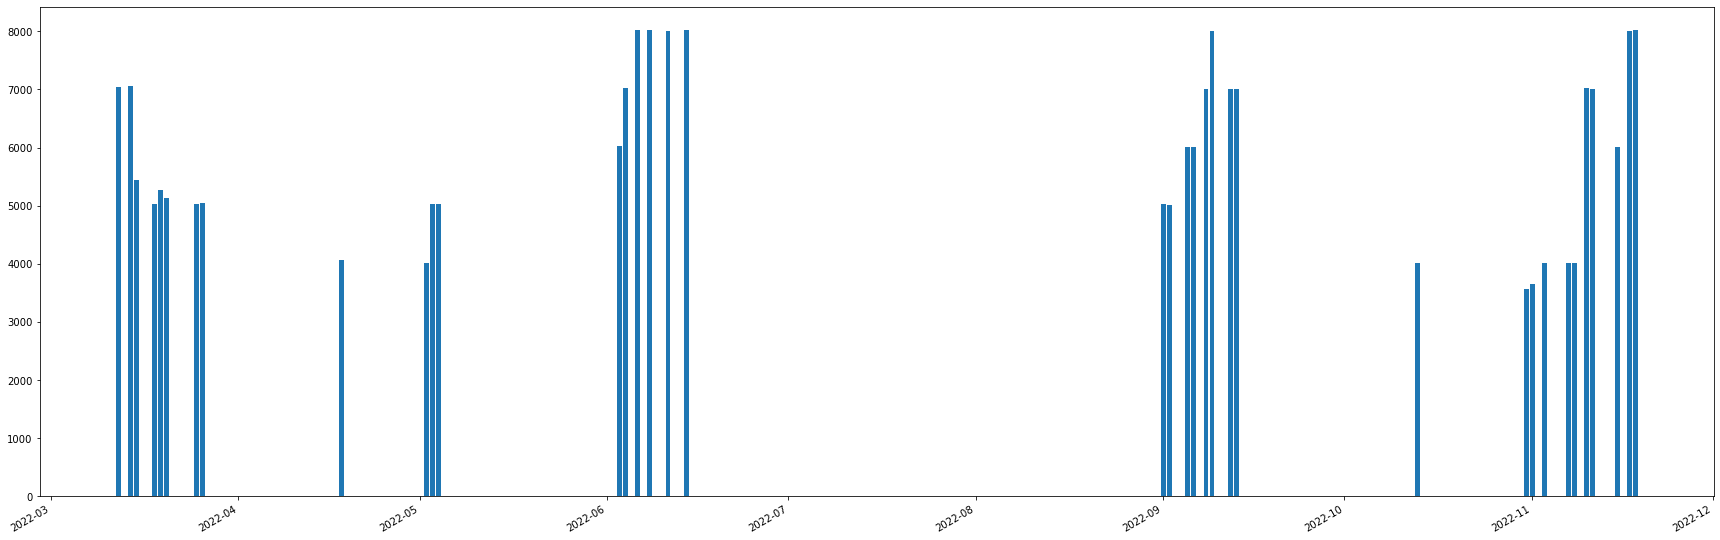

In [5]:
df['startDate'] = df['startDate'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
x = df['startDate']
y = df['totalDistance']

plt.figure(figsize=(30,10))

# plot
plt.bar(x, y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

And then I just calculated average time of my 8k runs

In [6]:
dur = df['duration']
dist = df['totalDistance']
total = 0.0
j = 0

for i, run in enumerate(dur):
    if dist[i] >= 8000.0:
        total += dur[i]/60
        j += 1

print(total/j)


42.182900883754094
